# Solar Challenge:Week0

## Importing Dependencies

In [6]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Loading the data

In [7]:
Sierraleone = pd.read_csv("../data/sierraleone-bumbuna.csv")
print(Sierraleone.shape)
Sierraleone.head()

(525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


## 1. Summary Statistics & Missing-Value Report

In [8]:
print("An overview of the dataset: the first 5 rows")
Sierraleone.head()

An overview of the dataset: the first 5 rows


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [9]:
print("An overview of the dataset: the last 5 rows")
Sierraleone.tail()

An overview of the dataset: the last 5 rows


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
525595,2022-10-29 23:56,-1.6,-0.1,-2.9,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525596,2022-10-29 23:57,-1.7,-0.1,-3.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525597,2022-10-29 23:58,-1.7,-0.1,-3.1,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN
525598,2022-10-29 23:59,-1.7,-0.2,-3.3,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN
525599,2022-10-30 00:00,-1.7,-0.1,-3.4,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN


In [10]:
print("An overview of the dataset: a random sample of 5 rows")
Sierraleone.sample(5)

An overview of the dataset: a random sample of 5 rows


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
192781,2022-03-12 21:02,-9.7,-0.5,-8.8,0.0,0.0,29.7,44.9,1.4,2.1,0.5,214.0,11.3,999,0,0.0,29.1,29.2,NaN
303396,2022-05-28 16:37,40.2,-1.0,40.3,41.0,38.9,29.8,70.4,4.0,5.2,0.7,36.0,17.8,998,0,0.0,32.2,32.2,NaN
67870,2021-12-16 03:11,-5.5,-0.3,-5.1,0.0,0.0,22.5,98.5,1.2,1.4,0.3,320.8,4.1,999,0,0.0,22.4,22.7,NaN
435838,2022-08-28 15:59,271.6,3.9,267.8,258.7,246.7,24.8,95.7,1.9,3.1,0.6,152.5,14.6,996,0,0.0,28.6,28.8,NaN
157292,2022-02-16 05:33,-11.0,-0.4,-10.9,0.0,0.0,20.8,77.4,0.0,0.0,0.0,0.0,0.0,999,0,0.0,19.7,19.8,NaN


In [11]:
print("An overview of the dataset: the shape of the dataset")
print(Sierraleone.info())

An overview of the dataset: the shape of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Timestamp      525600 non-null  object 
 1   GHI            525600 non-null  float64
 2   DNI            525600 non-null  float64
 3   DHI            525600 non-null  float64
 4   ModA           525600 non-null  float64
 5   ModB           525600 non-null  float64
 6   Tamb           525600 non-null  float64
 7   RH             525600 non-null  float64
 8   WS             525600 non-null  float64
 9   WSgust         525600 non-null  float64
 10  WSstdev        525600 non-null  float64
 11  WD             525600 non-null  float64
 12  WDstdev        525600 non-null  float64
 13  BP             525600 non-null  int64  
 14  Cleaning       525600 non-null  int64  
 15  Precipitation  525600 non-null  float64
 16  TModA          525600

In [12]:
Sierraleone['Timestamp'] = pd.to_datetime(Sierraleone['Timestamp'], errors='coerce')
print(Sierraleone.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

In [13]:
print("Check for missing values:")
print(Sierraleone.isna().sum())

Check for missing values:
Timestamp             0
GHI                   0
DNI                   0
DHI                   0
ModA                  0
ModB                  0
Tamb                  0
RH                    0
WS                    0
WSgust                0
WSstdev               0
WD                    0
WDstdev               0
BP                    0
Cleaning              0
Precipitation         0
TModA                 0
TModB                 0
Comments         525600
dtype: int64


In [26]:
#Identify columns with more than 5% missing values
threshold = 0.05 * len(Sierraleone)
null_cols = Sierraleone.isna().sum()[Sierraleone.isna().sum() > threshold]
print("Columns with more than 5% missing values:")
print(null_cols)

Columns with more than 5% missing values:
Comments    525600
dtype: int64


In [27]:
print("The description of the numeric columns:")
print(Sierraleone.describe())

The description of the numeric columns:
                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-04-30 12:00:30.000000768     201.957515     116.376337   
min              2021-10-30 00:01:00     -19.500000      -7.800000   
25%              2022-01-29 06:00:45      -2.800000      -0.300000   
50%              2022-04-30 12:00:30       0.300000      -0.100000   
75%              2022-07-30 18:00:15     362.400000     107.000000   
max              2022-10-30 00:00:00    1499.000000     946.000000   
std                              NaN     298.495150     218.652659   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      113.720571     206.643095     198.114691      26.319394   
min       -17.900000       0.000000       0.000000      12.300000   
25%        -3.800000       0.000000       0.000000   

In [28]:
print("The description of all columns:")
print(Sierraleone.describe(include='all'))

The description of all columns:
                           Timestamp            GHI            DNI  \
count                         525600  525600.000000  525600.000000   
mean   2022-04-30 12:00:30.000000768     201.957515     116.376337   
min              2021-10-30 00:01:00     -19.500000      -7.800000   
25%              2022-01-29 06:00:45      -2.800000      -0.300000   
50%              2022-04-30 12:00:30       0.300000      -0.100000   
75%              2022-07-30 18:00:15     362.400000     107.000000   
max              2022-10-30 00:00:00    1499.000000     946.000000   
std                              NaN     298.495150     218.652659   

                 DHI           ModA           ModB           Tamb  \
count  525600.000000  525600.000000  525600.000000  525600.000000   
mean      113.720571     206.643095     198.114691      26.319394   
min       -17.900000       0.000000       0.000000      12.300000   
25%        -3.800000       0.000000       0.000000      23.10

In [29]:
# Exact duplicate rows
dup_count = Sierraleone.duplicated().sum()
print("Duplicate rows:", dup_count)

# Cardinality (uniqueness) for categoricals
cat_cols = Sierraleone.select_dtypes(include=["object", "category"]).columns.tolist()
cardinality = {c: Sierraleone[c].nunique() for c in cat_cols}
print("Cardinality (categoricals):", cardinality)

Duplicate rows: 0
Cardinality (categoricals): {}


## 2. Outlier Detection & Basic Cleaning

### Z-Score Method (|z|>3)

In [30]:
from scipy import stats

target_cols = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']
focus_cols = [c for c in target_cols if c in Sierraleone.columns]

if focus_cols:
    z_s = np.abs(stats.zscore(Sierraleone[focus_cols], nan_policy="omit"))
    if len(focus_cols) ==1:  #zscore returns 1D if only one column
        z_s = z_s.reshape(-1,1)
    z_outliers_mask = (z_s > 3).any(axis=1)
    print("Z-score outlier rows:", int(z_outliers_mask.sum()))
    
    # Keep only rows where all |Z| <= 3 (no outliers)
    Sierraleone_clean = Sierraleone.loc[~z_outliers_mask].copy()
    print("After removing Z-score outliers:", Sierraleone_clean.shape)
else:
    print("No target columns found for Z-score analysis.")
    Sierraleone_clean = Sierraleone.copy()

Z-score outlier rows: 16292
After removing Z-score outliers: (509308, 19)


### Cleaning and Exporting Clean Data

In [31]:
key_cols = [c for c in ['GHI','DNI','DHI','ModA','ModB','WS','WSgust','RH','Tamb'] if c in Sierraleone_clean.columns]
for c in key_cols:
    if Sierraleone_clean[c].isna().any():
        Sierraleone_clean[c] = Sierraleone_clean[c].fillna(Sierraleone_clean[c].median())

print("Remaining NA in key columns:")
print(Sierraleone_clean[key_cols].isna().sum())

# Export cleaned DataFrame
Sierraleone_clean.to_csv("../data/sierraleone_clean.csv", index=False)
print("Cleaned dataset saved to: ../data/sierraleone_clean.csv")

Remaining NA in key columns:
GHI       0
DNI       0
DHI       0
ModA      0
ModB      0
WS        0
WSgust    0
RH        0
Tamb      0
dtype: int64
Cleaned dataset saved to: ../data/sierraleone_clean.csv


## 3. Time Series Analysis

Plotting GHI, DNI, DHI, and Tamb vs Timestamp


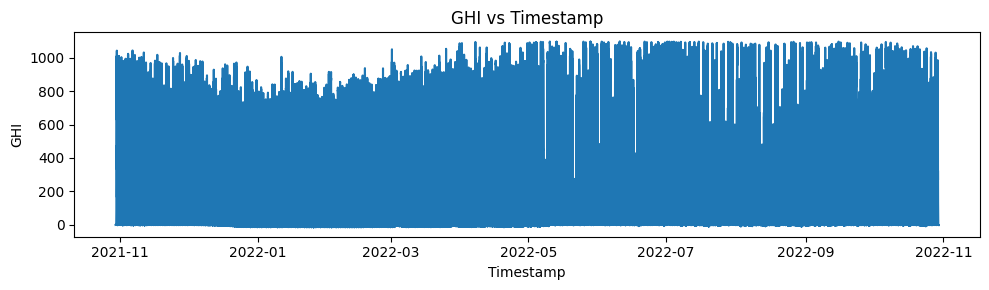

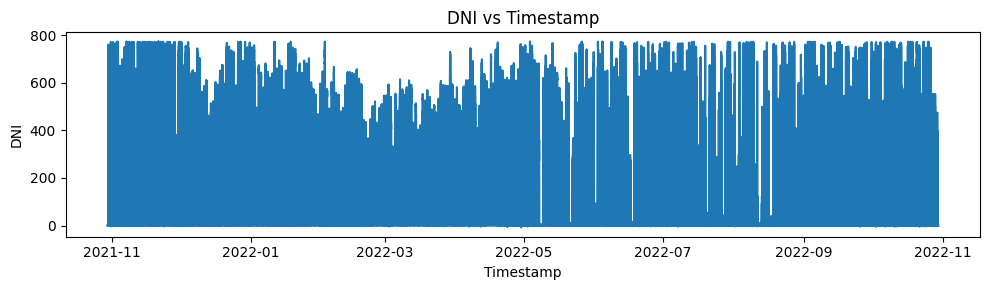

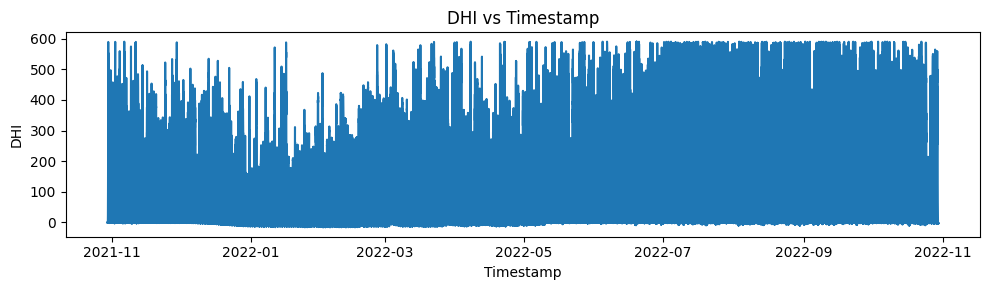

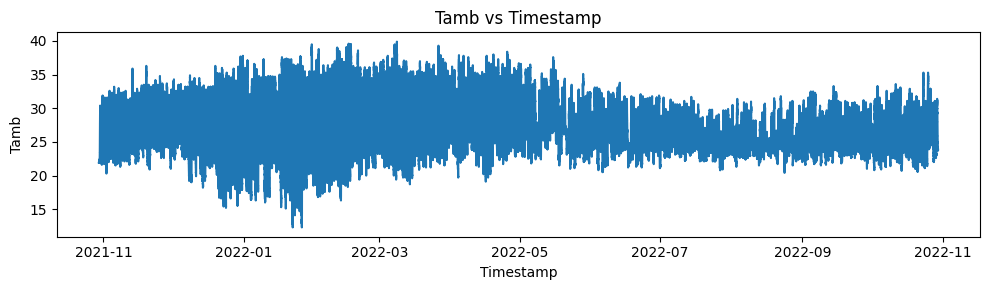

In [32]:
print("Plotting GHI, DNI, DHI, and Tamb vs Timestamp")

time_col = "Timestamp"
if time_col in Sierraleone_clean.columns:
    for col in ['GHI', 'DNI', 'DHI', 'Tamb']:
        if col in Sierraleone_clean.columns:
            plt.figure(figsize=(10,3))
            plt.plot(Sierraleone_clean[time_col], Sierraleone_clean[col])
            plt.title(f"{col} vs Timestamp")
            plt.xlabel("Timestamp")
            plt.ylabel(col)
            plt.tight_layout()
            plt.show()
else:
    print("Timestamp column not found in dataset.")

## 4. Cleaning Impact 

Plotting average ModA and ModB by Cleaning flag


C:\Users\yamis\AppData\Local\Temp\ipykernel_27224\494311605.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Sierraleone_clean, x='Cleaning', y=col, estimator=np.mean, ci=None)


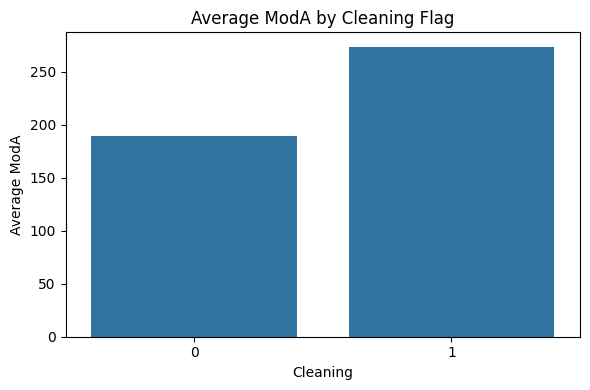

C:\Users\yamis\AppData\Local\Temp\ipykernel_27224\494311605.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=Sierraleone_clean, x='Cleaning', y=col, estimator=np.mean, ci=None)


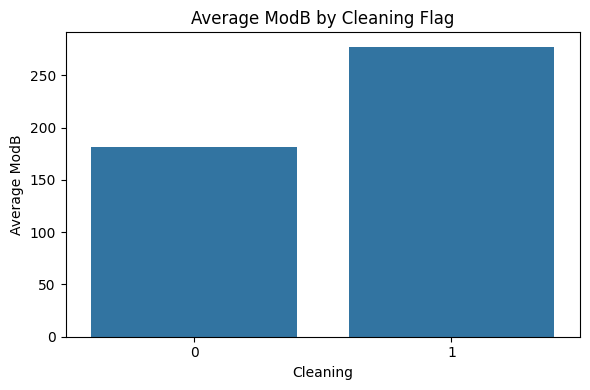

In [33]:
print("Plotting average ModA and ModB by Cleaning flag")

if 'Cleaning' in Sierraleone_clean.columns:
    for col in ['ModA', 'ModB']:
        if col in Sierraleone_clean.columns:
            plt.figure(figsize=(6,4))
            sns.barplot(data=Sierraleone_clean, x='Cleaning', y=col, estimator=np.mean, ci=None)
            plt.title(f"Average {col} by Cleaning Flag")
            plt.xlabel("Cleaning")
            plt.ylabel(f"Average {col}")
            plt.tight_layout()
            plt.show()
else:
    print("No 'Cleaning' column found in dataset.")

## 5. Correlation & Relationship Analysis 

### Correlation Heatmap

,GHI,DNI,DHI,TModA,TModB
GHI,1.000000,0.861422,0.882559,0.925098,0.913510
DNI,0.861422,1.000000,0.554180,0.809829,0.802848
DHI,0.882559,0.554180,1.000000,0.824205,0.820861
TModA,0.925098,0.809829,0.824205,1.000000,0.993136
TModB,0.913510,0.802848,0.820861,0.993136,1.000000


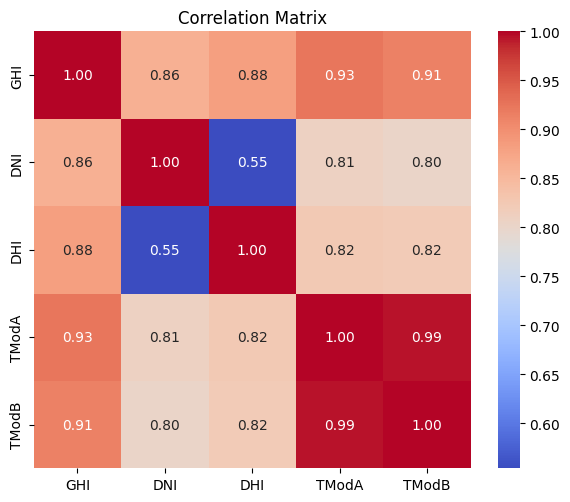

In [34]:
corr_cols = [c for c in ['GHI', 'DNI', 'DHI', 'TModA', 'TModB'] if c in Sierraleone_clean.columns]
if corr_cols:
    corr = Sierraleone_clean[corr_cols].corr()
    display(corr)
    plt.figure(figsize=(6,5))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
    plt.title("Correlation Matrix")
    plt.tight_layout()
    plt.show()

### Scatter plot for relationships

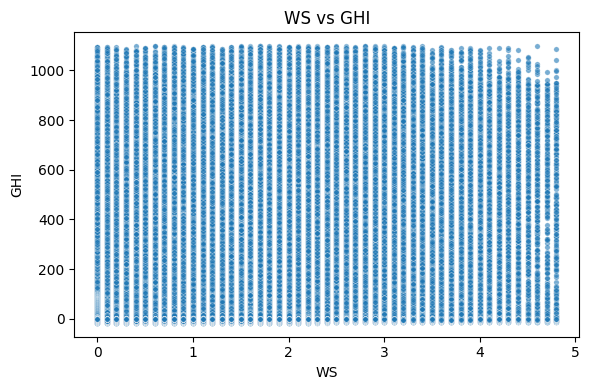

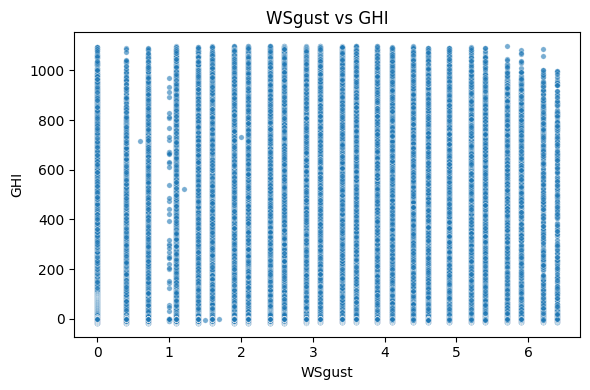

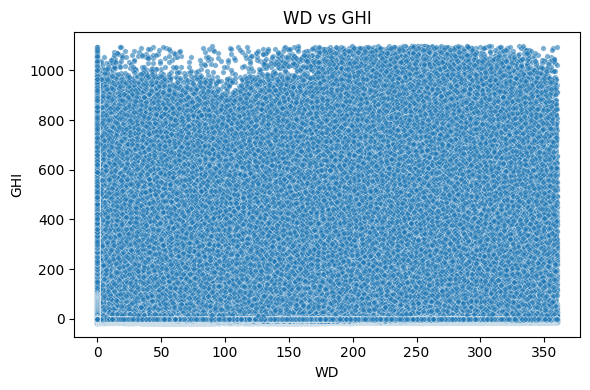

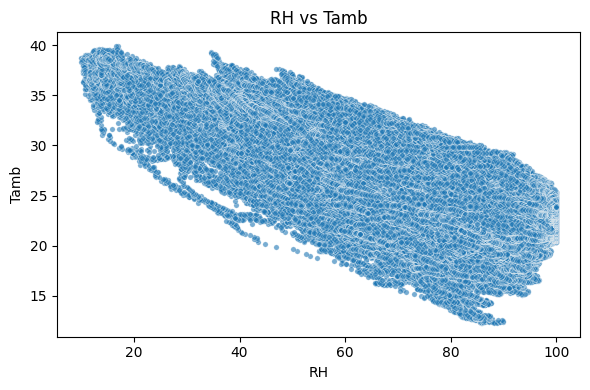

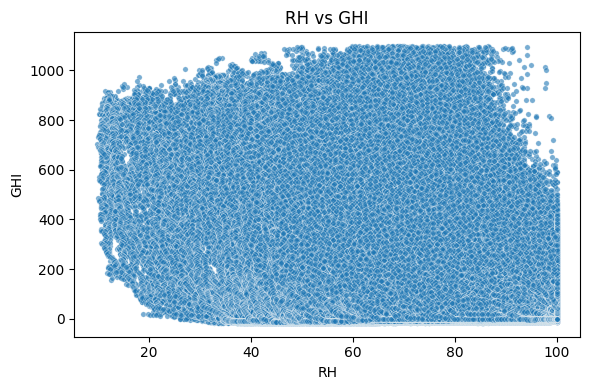

In [35]:
pairs = [
    ('WS', 'GHI', "WS vs GHI"),
    ('WSgust', 'GHI', "WSgust vs GHI"),
    ('WD', 'GHI', "WD vs GHI"),
    ('RH', 'Tamb', "RH vs Tamb"),
    ('RH', 'GHI', "RH vs GHI")
]

for x, y, title in pairs:
    if x in Sierraleone_clean.columns and y in Sierraleone_clean.columns:
        plt.figure(figsize=(6,4))
        sns.scatterplot(data=Sierraleone_clean, x=x, y=y, s=15, alpha=0.6)
        plt.title(title)
        plt.tight_layout()
        plt.show()

## 6. Wind & Distribution Analysis

Plotting wind rose and histograms for key variables


C:\Users\yamis\AppData\Local\Temp\ipykernel_27224\3982517659.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_ws = Sierraleone_clean.groupby(cats)['WS'].mean().reindex(cats.cat.categories)


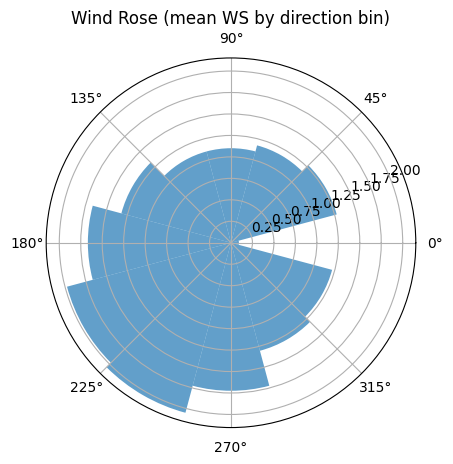

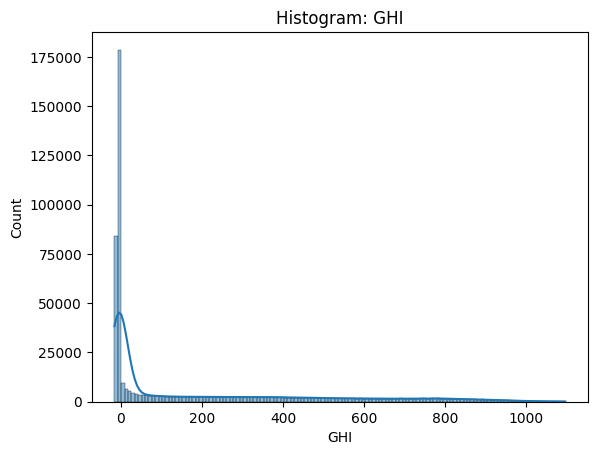

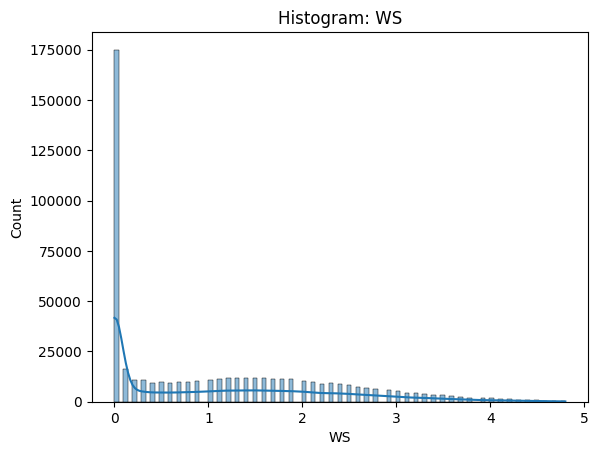

In [36]:
print("Plotting wind rose and histograms for key variables")

# Wind rose (mean WS by direction bin)
if 'WD' in Sierraleone_clean.columns and 'WS' in Sierraleone_clean.columns:
    bins = np.arange(0, 361, 30)
    cats = pd.cut(Sierraleone_clean['WD'] % 360, bins=bins, right=False, include_lowest=True)
    mean_ws = Sierraleone_clean.groupby(cats)['WS'].mean().reindex(cats.cat.categories)

    centers = np.deg2rad([interval.left for interval in mean_ws.index])
    values = mean_ws.fillna(0).values

    ax = plt.subplot(111, polar=True)
    ax.bar(centers, values, width=np.deg2rad(30), bottom=0.0, alpha=0.7)
    ax.set_title("Wind Rose (mean WS by direction bin)")
    plt.show()
else:
    print("Wind direction or speed data not found; skipping wind rose plot.")

# Histograms for GHI and WS (if they exist)
for c in ['GHI', 'WS']:
    if c in Sierraleone_clean.columns:
        plt.figure()
        sns.histplot(Sierraleone_clean[c], kde=True)
        plt.title(f"Histogram: {c}")
        plt.xlabel(c)
        plt.ylabel("Count")
        plt.show()

## 7. Tempreature Analysis

Examining relationship between Relative Humidity (RH) and Temperature/Solar Radiation


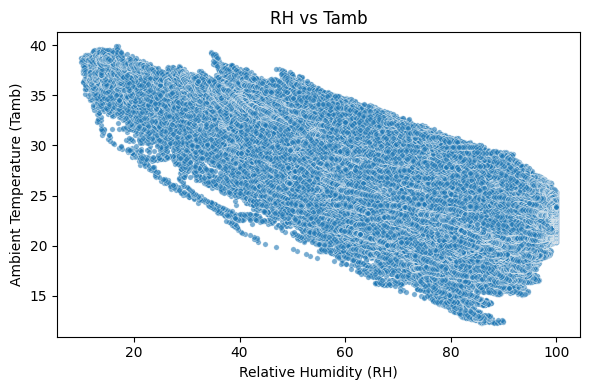

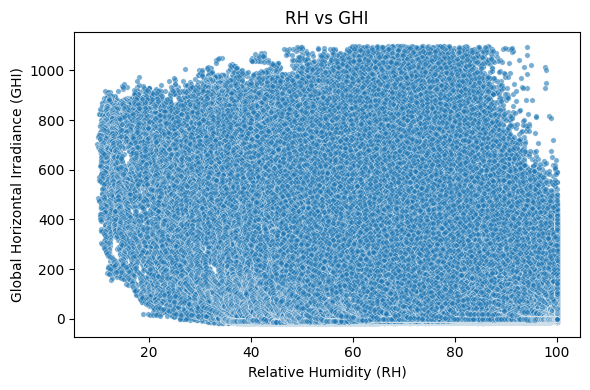

In [37]:
print("Examining relationship between Relative Humidity (RH) and Temperature/Solar Radiation")

if 'RH' in Sierraleone_clean.columns and 'Tamb' in Sierraleone_clean.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=Sierraleone_clean, x='RH', y='Tamb', s=15, alpha=0.6)
    plt.title("RH vs Tamb")
    plt.xlabel("Relative Humidity (RH)")
    plt.ylabel("Ambient Temperature (Tamb)")
    plt.tight_layout()
    plt.show()

if 'RH' in Sierraleone_clean.columns and 'GHI' in Sierraleone_clean.columns:
    plt.figure(figsize=(6,4))
    sns.scatterplot(data=Sierraleone_clean, x='RH', y='GHI', s=15, alpha=0.6)
    plt.title("RH vs GHI")
    plt.xlabel("Relative Humidity (RH)")
    plt.ylabel("Global Horizontal Irradiance (GHI)")
    plt.tight_layout()
    plt.show()

## 8. Bubble Chart

Plotting bubble chart: GHI vs Tamb with bubble size = RH or BP


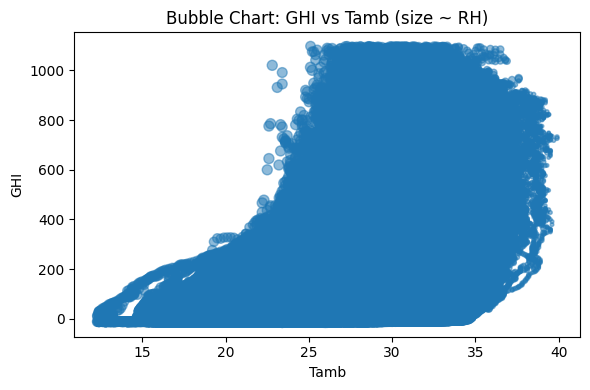

In [38]:
print("Plotting bubble chart: GHI vs Tamb with bubble size = RH or BP")

if 'GHI' in Sierraleone_clean.columns and 'Tamb' in Sierraleone_clean.columns:
    if 'RH' in Sierraleone_clean.columns:
        size_col = 'RH'
    elif 'BP' in Sierraleone_clean.columns:
        size_col = 'BP'
    else:
        size_col = None

    if size_col:
        s = Sierraleone_clean[size_col]
        sizes = 50 * (s - s.min()) / (s.max() - s.min() + 1e-9) + 5  # scaled sizes

        plt.figure(figsize=(6,4))
        plt.scatter(Sierraleone_clean['Tamb'], Sierraleone_clean['GHI'], s=sizes, alpha=0.5)
        plt.xlabel("Tamb")
        plt.ylabel("GHI")
        plt.title(f"Bubble Chart: GHI vs Tamb (size ~ {size_col})")
        plt.tight_layout()
        plt.show()
    else:
        print("Neither RH nor BP found for bubble sizing; skipping bubble chart.")